### **Group 31** <br>
* Ana Margarida Valente, nr 20240936
* Eduardo Mendes, nr 20240850
* Julia Karpienia, nr 20240514
* Marta Boavida, nr 20240519
* Victoria Goon, nr 20240550

<hr>

**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Datasets](#importdatasets)
* [2. Data Exploration](#dataexploration)
    * [2.1. Data Content and decriptive analysis](#dataanalysis)
    * [2.2. Checking incoherencies in the data](#incoherencies)
       * [2.2.1 Changing the data types](#types)
       * [2.2.2 Checking Duplicates](#duplicates)
       * [2.2.3 Checking Unique Values & looking for some values that can indicate missing values](#unique)
* [3. Data Visualisation](#visualisation)
   * [3.1. Define Metric and Non-Metric Features](#metricandnon)
   * [3.2 Metric Features](#metric)
   * [3.3 Non-Metric Features](#non)
   * [3.4 Target Variable](#33-target-variable)
* [4. Data Cleaning and Pre-Processing](#clean)
   * [4.1. Missing values in the target variable  - Claim Injury Type](#nantarget)
   * [4.2. Missing values in the independent variables](#nanindependent)
* [5. Multivariate Analysis](#multi)
* [6. Outliers](#outliers)
  * [6.1. Visualisation of Outliers](#viewoutliers)
  * [6.2. Outlier Removal](#removeoutliers)
    * [6.2.1 Manual Outlier Removal](#manual)
* [7. Feature Engineering](#feateng)
* [8. Data Transformation](#transform)
  * [8.1. Feature Encoding](#encode)
  * [8.2. Min-max Scaler](#minmax)
  * [8.3 Standard Scaler](#std) 
* [9. Feature Selection](#featselect)
  * [9.1. Filter Methods](#filter)
    * [9.1.1 Univariate Variables](#uni)
    * [9.1.2 Chi-Square](#chi)
  * [9.2 Wrapper Methods](#wrapper)
    * [9.2.1 RFE](#rfe)
  * [9.3 Embedded Methods](#embedded)
    * [9.3.1 Lasso Regression](#lasso)
  * [9.4 Select K Best Method](#select)
  * [9.5 Drop Features According to Feature Selections](#dropfeat)  
         



<hr>
<a class="anchor" id="import">
    
# 1. Import 
    

</a> 

<a class="anchor" id="importlibraries">

### 1.1. Import Libraries

</a>

In [ ]:
## Import standard data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

from math import ceil
from sklearn.impute import KNNImputer

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


## Import Libraries for Feature Selection
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV


## Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

# Import Cross Validation methods
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Supress warnings
import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="importdatasets">

### 1.2. Import Datasets

</a>

In [ ]:
train_data = pd.read_csv("train_data.csv", low_memory=False)
test_data = pd.read_csv("test_data.csv")

<hr>
<a class="anchor" id="Dataexploration">
    
# 2. Data Exploration
    
</a>

<a class="anchor" id="dataanalysis">

### 2.1. Data content and descriptive analysis

</a>

In [ ]:
train_data.head()


In [ ]:
test_data.head()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

Train data has 3 more variables than test data. We can see below which feature are train, but not in test.

In [ ]:
test_data.columns.values

In [ ]:
train_data.columns.values

In the Test dataset there is not variables such as: Claim Injury Type (reasonable because it is target variable), Agreement Reached and WCB Decision.

In [ ]:
# Set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [ ]:
train_data.describe(include="all").T

---

<a class="anchor" id="incoherencies">

### 2.2. Checking incoherencies in the data. 

</a> 

In [ ]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) 
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

In [ ]:
test_data.info()

<a class="anchor" id="types">

#### 2.2.1 Changing the data types

</a> 

In [ ]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'])
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'])

train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date'])
test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date'])

<a class="anchor" id="duplicates">

#### 2.2.2 Checking Duplicates

</a> 

In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = train_data.loc[train_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

# Display the first 30 rows
duplicates_sorted.head(30)

In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = test_data.loc[test_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

# Display the first 30 rows
duplicates_sorted.head(30)

In [ ]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training dataset.")
print(f"There are {duplicates_sum_test} in the test dataset.")

We do not drop duplicates in the test dataset. We only do that in the train dataset.

In [ ]:
train_data.drop_duplicates(inplace=True)

<a class="anchor" id="unique">

#### 2.2.3 Checking unique values & looking for some values that can indicate missing values

</a> 

In [ ]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

Cells below are commented because they were used to check more detailed unique values for chosen variables

In [ ]:
# train_data['Accident Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Age at Injury'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Assembly Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Average Weekly Wage'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Birth Year'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['C-2 Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['C-3 Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Carrier Name'].value_counts().sort_index()

In [ ]:
# train_data['Carrier Type'].value_counts().sort_index()

In [ ]:
# train_data['First Hearing Date'].value_counts().sort_index()

In [ ]:
# train_data['Zip Code'].value_counts().sort_index()

#### All listed Variables - unique variables summary 

1. **Accident Date**: contains dates, no strange values (5539 unique values)

2. **Age at Injury**: there are some values >100 and there is age equal to  0  (108 unique values) 
3. **Alternative Dispute Resolution**: there is one strange unique value such as "U" (3 unique values)
4. **Assembly Date**: containts dates, no strange values (1096 unique values)
5. **Attorney/Representative**: no strange values (2 unique values)
6. **Average Weekly Wage**: no typical strange values but there are many records sayin that avg weekly wage is equal to 0, a lot of unique values (120024 unique values)
7. **Birth Year**:  one strange values "0" (Birth Year cannot be 0) (107 unique values)
8. **C-2 Date**: contains data, there are some years from 90s (2475 unique values)
9. **C-3 Date**: contains data, there are some years from 90s (1648 unique values)
10. **Carrier Name**: there are some strange description such as: '*** CARRIER UNDETERMINED ***', (2046 unique values) 
11. **Carrier Type**: there is one strange value 'UNKNOWN' (8 unique values)
12. **Claim Injury Type**: no strange values (8 unique values)
13. **County of Injury**: there is one strange value 'UNKNOWN' (63 unique values)
14. **COVID-19 Indicator**: no strange values (2 unique values)
15. **District Name**: no strange values (8 unique values)
16. **First Hearing Date**: no strange values (1094 unique values)
17. **Gender**: two strange values 'U' 'X' (4 unique values)
18. **Industry Code**: no strange values (24 unique values)
19. **Industry Code Description**: no strange values (20 unique values)
20. **Medical Fee Region**: one strange value 'UK' (4 unique values)
21. ***OIICS Nature of Injury Description**: variable does not contain any data
22. **WCIO Cause of Injury Code**: no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: no strange values (56 unique values)
26. **WCIO Part Of Body Code**: one strange values "-9" (57 unique values)
27. **WCIO Part Of Body Description**: no strange values (54 unique values)
28. **Zip Code**:  this variables is a bit strange, it has some strange zip codes such as zip code '.1605', '00000' or '99999' that does not exist, also it has zip codes that starts with letters not with numbers as well as one unique value 'UNKNO' (8286 unique values)
29. **Agreement Reached**:  no strange values (2 unique values)
30. **WCB Decision**: no strange values (1 unique value)
31. **Number of Dependents**: no strange values (7 unique values)


Based on the description above we changed strange values to missing values.

In [ ]:
# Filling missing values with NaN

train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
test_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)

train_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)
test_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)

train_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)
test_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)

train_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)
test_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)

train_data['Gender'].replace(['X','U'], np.nan, inplace = True)
test_data['Gender'].replace(['X','U'], np.nan, inplace = True)

train_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)
test_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)

train_data['Zip Code'].replace([".1605", "00000", "99999","UNKNO"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999", "UNKNO"], np.nan, inplace=True)

Investigating 0 values in the Age variable

In [ ]:
train_data[train_data['Age at Injury'] == 0].shape

In [ ]:
# age_at_injury_zero = train_data[train_data['Age at Injury'] == 0]
# age_at_injury_zero.groupby('Birth Year')['Age at Injury'].value_counts(dropna=False).sort_index()

There are 5463 zeros in total in the variables Age at Injury.
- There are 1926 values that are 0 both in Birth Year as well as at Age at Injury 
- The rest of the zero values (3537) in the variable Age at Injury can be replaced with actual age calulated as accident date - birth year 

Replacing the Age at Injury values that are equal to 0 (where Birth Year is not equal to 0) with the actual age calculated from the difference between the Accident Date and the Birth Year

In [ ]:
train_data['Actual Age'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

filtered_rows = train_data[(train_data['Birth Year'] != 0) & (train_data['Age at Injury'] == 0)]

train_data.loc[filtered_rows.index, 'Age at Injury'] = train_data['Actual Age']

In [ ]:
test_data['Actual Age'] = test_data['Accident Date'].dt.year - test_data['Birth Year']

filtered_rows = test_data[(test_data['Birth Year'] != 0) & (test_data['Age at Injury'] == 0)]

test_data.loc[filtered_rows.index, 'Age at Injury'] = test_data['Actual Age']

Check if there are any incoherencies in between Age at Injury that is given in the data set and Actual Age calulated as difference between Accident Date and Birth Year

In [ ]:
train_data['Age Diff'] = train_data['Actual Age'] - train_data['Age at Injury']

age_difference = train_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


In [ ]:
test_data['Age Diff'] = test_data['Actual Age'] - test_data['Age at Injury']

age_difference = test_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Conclusion:

There are no incoherencies in between those two variables. the only unique values are 1 and -1 and that difference can be caused by the fact that we dont have the Birth Month, so Actual Age can be slightly different from the Age Calculated as subtraction of Accident Date and Birth Year.

In [ ]:
train_data.drop(columns=['Actual Age','Age Diff'], inplace=True)
test_data.drop(columns=['Actual Age', 'Age Diff'], inplace=True)

In [ ]:
# train_data['Age at Injury'].value_counts().sort_index()

In [ ]:
train_data[(train_data['Age at Injury'] == 0)].shape

In [ ]:
# train_data.groupby('Age at Injury')['Birth Year'].value_counts(dropna=False).sort_index()

Changing Age at Injury from 0 to missing values where the Birth Year has missing value.

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'].isna()), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'].isna()), 'Age at Injury'] = np.nan


Changing Age at Injury from 0 to missing values where the Birth Year is also 0

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'] == 0), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'] == 0), 'Age at Injury'] = np.nan

In [ ]:
# train_data['Age at Injury'].value_counts(dropna=False).sort_index()

At this point Birth Year variable can be dropped since it has similar info as Age at Injury 

In [ ]:
train_data = train_data.drop('Birth Year', axis=1)
test_data = test_data.drop('Birth Year', axis=1)

There is also strange value (code equal to -9) in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [ ]:
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]
filtered_data_train["WCIO Part Of Body Description"].value_counts()

In [ ]:
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]
filtered_data_test["WCIO Part Of Body Description"].value_counts()

We deal with that "-9" values after splitting into validation and training set (in the filling missing values section)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code based on their first digit of the ZipCode

In [ ]:
def categorize_zip(zip_code):
    if pd.isna(zip_code):  
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"

In [ ]:
train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

train_data['zip_code_cat'].value_counts(dropna=False)

After we created zip_code_cat we can drop the variable Zip Code

In [ ]:
train_data = train_data.drop('Zip Code', axis =1)
test_data = test_data.drop('Zip Code', axis =1)

We decided to drop variables such us: OIICS Nature of Injury Description and WCB Decision. First variable does not containt any values and second one contains only one unique value, so any of them are not informative. We drop WCB Decision only from the train_data because it is not included in the test_data

In [ ]:
train_data =train_data.drop(['OIICS Nature of Injury Description','WCB Decision','Agreement Reached'], axis=1)
test_data = test_data.drop(['OIICS Nature of Injury Description'],axis=1)

Based on the description of unique values we can assume that variables such as 'WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name' could be considered to being dropped, becuase they containts description of coded variables, so we do not need to duplicate the information. 

Recheck for unique values in those variables that have been changed

In [ ]:
# train_data['Alternative Dispute Resolution'].value_counts().sort_index()

In [ ]:
# train_data['Carrier Name'].value_counts().sort_index()

In [ ]:
# train_data['Carrier Type'].value_counts().sort_index()

In [ ]:
# train_data['County of Injury'].value_counts().sort_index()

In [ ]:
# train_data['Gender'].value_counts().sort_index()

In [ ]:
# train_data['Medical Fee Region'].value_counts().sort_index()

In [ ]:
# train_data['Zip Code'].value_counts().sort_index()

---

<a class="anchor" id="visualisation">

## 3. Data Visualisation

</a>

<a class="anchor" id="metricandnon">

### 3.1 Define Metric and Non-Metric Features

</a>

Before doing data visualisation we define metric and non-metric features

In [ ]:
train_data.columns

In [ ]:
### Define metric & non-metric features

metric_features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description","zip_code_cat"]


<a class="anchor" id="metric">

#### 3.2 Metric Features

</a>

In [ ]:
train_data['Age at Injury'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency') 
plt.show()

Analysis of variable Age at Injury:
- The data is primarily concentrated between ages 20 and 70, with minimal occurrences beyond age 80. 
- The age group with the highest frequency of injuries appears to be in the range of 40 to 50, followed closely by the 30-40 and 50-60 ranges.
- The histogram is roughly symmetric and bell-shaped, suggesting a somewhat normal distribution centered around middle-aged individuals (30-60).
- There are some cases of injuries at extreme ages (under 10 and over 80), though these are rare compared to the central age groups. (Possible outliers)


In [ ]:
train_data['Average Weekly Wage'].plot(
    kind='hist',
    color='bisque',
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis of variable Average Weekly Wage:
- Most data points are concentrated at the very low end of the wage scale, with a large spike around the minimum wage range. This suggests that the majority of individuals earn a relatively low weekly wage.
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- As wages increase, the frequency decreases rapidly. There are only a few occurrences of higher wages, suggesting that high average weekly wages are rare.
- There are small bars at the far right end of the scale (near 2.5 million), which could indicate a few extreme outliers or high-income earners in the dataset. (Possible outliers)

In [ ]:
train_data['IME-4 Count'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of IME-4 Count')
plt.xlabel('IME-4 Count')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis of variable IME-4 Count:
- The data is heavily skewed towards lower values of IME-4 Count, with the highest frequency occurring between 0 and 10. 
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- The frequency decreases as the IME-4 Count increases. There is a gradual decline from low to high values, with only a few occurrences beyond 50.
- There is a small bar at the far right (around 70), suggesting a few outliers with unusually high IME-4 Counts.

In [ ]:
train_data['Number of Dependents'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=5
)

plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency') 
plt.show()

Analysis of variable Number of Dependents:
•⁠  ⁠The highest frequencies are at 0 and 6 dependents.
•⁠  ⁠There is a noticeable decrease in frequency for categories 2, 3, and 4 dependents, indicating fewer cases.

In [ ]:
# def plot_filtered_histogram(data, column_name, min_value, max_value, bins=19):
    
#     # Filter the data to include only the values in the specified range
#     filtered_data = train_data[(train_data[column_name] >= min_value) & (train_data[column_name] <= max_value)][column_name].dropna()
    
#     #Histogram
#     plt.figure(figsize=(10, 6))
#     plt.hist(filtered_data, bins=bins, color='bisque', edgecolor='black')
#     plt.title(f'Histogram of {column_name} (range: {min_value} to {max_value})')
#     plt.xlabel(column_name)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()

In [ ]:
# plot_filtered_histogram(train_data, column_name="Birth Year", min_value=1920, max_value=2024, bins=19)

<a class="anchor" id="non">

#### 3.2 Non-Metric Features

</a>

In [ ]:
# for column in non_metric_features:
    
#     top_categories = train_data[column].value_counts().head(10)

#     top_categories_sorted = top_categories.sort_values(ascending=True)

#     data_filtered = train_data[train_data[column].isin(top_categories_sorted.index)]
    
   
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=data_filtered, 
#                   x=column, 
#                   order=top_categories_sorted.index,  
#                   palette='tab20b')
    
  
#     plt.xlabel(column, fontsize=14)
#     plt.ylabel('Count', fontsize=14)
#     plt.title(f'Top 10 Categories in {column}')
    
    
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

### Analysis of Categorical Variables
 - **Industry Code**

    The top 2 industry codes are **62** (almost 120.000) and **92** (almost 100.000) with a large marge relatively to the rest


 - **WCIO Cause of Injury Code**

   The most common cause of injury has the code **56** (almost 50.000) with a marge relatively to the others


 - **WCIO Nature of Injury Code** 

   The top 2 industry codes are **52** (close to 160.000) and **10** (closte to 110.000) with a large marge relatively to the rest


 - **WCIO Part of Body Code** 

   The most common causes of injury have the code **42** (slightly exceeds 50.000) and **53** (close to 50.000)


 - **Accident Date**

   01-03-2023 (slightly exceeds 1200) with a large marge relatively to the others


- **Alternative Dispute Resolution**

   100% = No


- **Assembly Date** 

   Top 3: 06-03-2020 (1400), 11-05-2021 (close to 1400) and 01-04-2022 (slightly exceeds 1200)


- **Attorney/Representative**

   Almost 400.000 = No


- **C-2 Date**

   11-05-2021 (close to 1875) with a large marge in relation to the others


- **C-3 Date**

   Top 3: 21-04-2021, 26-10-2020 and 10-02-2020 (all 3 close to 350)


- **Carrier Name** 

   State Insurance Fund (more than 100.000) with a large marge in relation to the others


- **Carrier Type**

   1A.Private (almost 300.000) with a large marge in relation to the others


- **County of Injury**

   Top 3: Suffolk (more than 60.000), Queens (almost 60.000) and Kings (slightly exceeds 50.000)


- **COVID-19 Indicator**

   No (Close to 550.000)


- **District Name**

   NYC (slightly exceeds 255.000) with a large marge in relation to the others


- **Fisrt Hearing Date**

   Top 3: 15-04-2022 (close to 500), 20-01-2022 (slightly exceeds 400) and 15-02-2022 (400)


- **Gender** 

   Male with almost 350.000


- **Industry Code Description**

   The more frequent are: Health Care and Social Assistance (almost 120.000) and Public Administration (slightly exceeds 90.000) with a large marge in relation to the others


- **Medical Fee Region** 

   IV (close to 275.000) with a large marge in relation to the others


- **WCIO Cause os Injury Description**

   Top 3: Fellow worker, Patient or Other Person (close to 50.000), Strain or Injury By, NOC (close to 40.000) and Fall, Slip or Trip, NOC (slightly exceeds 30.000)


- **WCIO Nature of Injury Description**

   Strain or Tear (150.000) and Contusion (slightly exceeds 100.000) with a large marge in relation to the others


- **WCIO Part of Body Description**

   Top 3: Lower Back Area (close to 50.000), Knee (close to 50.000) and Multiple (slightly exceeds 40.000)


- **Zip Code Categorie**

   1 (slightly exceeds 500.000) with a large marge in relation to the others

<a class="anchor" id="non">

#### 3.3 Target variable

</a>

### Claim Injury Type distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data,
              x='Claim Injury Type',  
              palette='tab20b')
    
  
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Target Variable')
    
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis of Target Variable
-  ⁠The target variable, "Claim Injury Type," shows a significant class imbalance.
-  ⁠The most common category is "2. NON-COMP", with around 300.000 cases, which is far more frequent than any other category.
- ⁠"4. TEMPORARY" and "3. MED ONLY" follow as the second and third most common categories, but with notably fewer counts than "2. NON-COMP".
-  ⁠The categories "1. CANCELLED", "6. PPD NSL", "7. PTD", and "8. DEATH" have very few cases, indicating they are rare events in the dataset.

---

<a class="anchor" id="clean">

## 4. Data Cleaning and Pre-processing

</a>

<a class="anchor" id="nantarget">

### 4.1 Missing values in the target variable - Claim Injury Type

</a>

In [ ]:
train_data["Claim Injury Type"].isna().sum()

In [ ]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

In [ ]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

In [ ]:
train_data= train_data.drop(missing_data_target.index)

Re check for missing values in the target variable

In [ ]:
train_data['Claim Injury Type'].isna().sum()

---

<a class="anchor" id="nanindependent">

### 4.2 Missing values in the intependent variables

</a>

##### - Before we check for missing values in the independet variables we split our data into training and validation set

In [ ]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


##### Checking the number of missing values in each variable in the train and validation set (number and percentage)

In [ ]:
# missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
# print(missing_values_train)

In [ ]:
# missing_values_val = X_val.isnull().sum().sort_values(ascending=False)
# print(missing_values_val)

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
print(missing_percentage_test)

Variables such as ***IME-4 Count*** , ***First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> In variables ***IME-4 Count*** we assume that missing values states that IME-4 form has not been received. Therefore missing values will be replaced with 0.
<br> Missing values in variable ***First Hearing Date*** means that claim has not yet had a hearing held (information provided in dataset description) Thus, it is an information that we want to keep. 
<br> For missing values in variables ***C-3 Date*** we asume that missing value means that Employee Claim Form has not been received. 

In the first trial we deleted those three variables since they have a lot of missing values but as we run the model without and got poorly performing model we decided to keep them and we found out that they have significant impact on the target variable and should not be dropped (model performance increased)

- **IME-4 Count** changing missing values to 0

In [ ]:
X_train.loc[X_train["IME-4 Count"].isna(), "IME-4 Count"] = 0
X_val.loc[X_val["IME-4 Count"].isna(), "IME-4 Count"] = 0
test_data.loc[test_data["IME-4 Count"].isna(), "IME-4 Count"] = 0

- **First Hearing Date** 
<br> We decided to change that varibale to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearing has already been held.

In [ ]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)

X_train[['First Hearing Date', 'First Hearing Date Binary']].head()


First Hearing Data variable can be droped after creating binary variable.

In [ ]:
X_train =X_train.drop("First Hearing Date", axis=1)
X_val =X_val.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [ ]:
non_metric_features.remove('First Hearing Date')
non_metric_features.append('First Hearing Date Binary')

- **C-2 Date Bin**

In [ ]:
X_train['C-2 Date Bin'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Bin'] = X_val['C-2 Date'].notna().astype(int)
test_data['C-2 Date Bin'] = test_data['C-2 Date'].notna().astype(int)

X_train[['C-2 Date', 'C-2 Date Bin']].head()
non_metric_features.append('C-2 Date Bin')

- **C-3 Date** Creating a binary variable from C-3 Date. Changing missing values to 0 and dates to 1

In [ ]:
X_train['C-3 Date Bin'] = X_train['C-3 Date'].notna().astype(int)
X_val['C-3 Date Bin'] = X_val['C-3 Date'].notna().astype(int)
test_data['C-3 Date Bin'] = test_data['C-3 Date'].notna().astype(int)

X_train[['C-3 Date', 'C-3 Date Bin']].head()

In [ ]:
non_metric_features.remove('C-3 Date')
non_metric_features.append('C-3 Date Bin')

In [ ]:
X_train =X_train.drop("C-3 Date", axis=1)
X_val =X_val.drop("C-3 Date", axis=1)
test_data =test_data.drop("C-3 Date", axis=1)

Re check for missing percentage in the datasets

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
missing_percentage_val = missing_percentage_val[missing_percentage_val > 0]
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0]
print(missing_percentage_test)

As it was mentioned in the part "Checking incoherencies in the data" **WCIO Part of Body Code** has negavite codes such us -9. Each code that is equal to -9 corresponds in the description to Multiple.
Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill those values (-9) with mode among codes that corresponds to multiple. 

In [ ]:
# Valid codes for "Multiple" according to codes at WCIO website (https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode (without changing other NaN values)
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


- All missing values in the variable ***Average Weekly Wage*** are replaced by median 

In [ ]:
# median_wage = X_train["Average Weekly Wage"].median()
# X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

# X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
# test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


-  Replacing missing values in variable Age at Injury with mean (That variable is almost normal distributed) -->

In [ ]:
# mean_age = int(X_train["Age at Injury"].mean())

# X_train["Age at Injury"].fillna(mean_age, inplace=True)

# X_val["Age at Injury"].fillna(mean_age, inplace=True)

# test_data["Age at Injury"].fillna(mean_age, inplace=True)

- All missing values in the variable ***Average Weekly Wage***  and ***Age at Injury*** are replaced by KNNImputer 

In [ ]:
features_to_impute = ['Average Weekly Wage', 'Age at Injury']

imputer = KNNImputer(n_neighbors=5, weights="uniform")

X_train[features_to_impute] = imputer.fit_transform(X_train[features_to_impute])
X_val[features_to_impute] = imputer.transform(X_val[features_to_impute])
test_data[features_to_impute] = imputer.transform(test_data[features_to_impute])

- Categorical variables that missing values should be replaced with mode

In [ ]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'Carrier Name',
    'County of Injury',
    'Alternative Dispute Resolution'
]

In [ ]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

---

Re check for number of  missing values

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

In [ ]:
X_val.isna().sum().sort_values(ascending=False)

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

---

- After analysis we also decided to drop variables that contain descriptions of other coded variables.

In [ ]:
columns_to_drop_desc = ['WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name', 'Industry Code Description']

X_train =X_train.drop(columns_to_drop_desc, axis=1)
X_val = X_val.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

non_metric_features = [feature for feature in non_metric_features if feature not in columns_to_drop_desc]


<a class="anchor" id="multi">

## 5. Multivariate Analysis
</a>

In [ ]:
# Test cross tabular 
cross = pd.crosstab(X_train["Attorney/Representative"], X_train['First Hearing Date Binary'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

Only 5% of folks who had a "First Hearing Date" did NOT have an attorney and 9% had an attorney but no hearing date. These situations are a little unusual but not strange. Not having an attorney when there is no hearing date is expected.

Looking below, the distribution of "Claim Injury Types" is quite even throughout, whereas the distribution for when data for the "First Hearing Date" wasn't available. "Non-Comp" seems to be the predominate value.

In [ ]:
cat_df = X_train.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Examining the following histogram  for when an attonrey/representative is present or not, for when an attonrey/representative isn't present, the values seem more imbalanced with supports the initial hypothesis that if an attorney is involved, the claim injury being compensated is less likely.

In [ ]:
cat_df = X_train.groupby([X_train["Attorney/Representative"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is no attorney and there is no first hearing date. The wide imbalance shows that this could be a particular variable relationship that could help with deciding Claim Injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "N")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when No Attorney is Present")
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is an attorney. Compared to the last histogram, this one's values are more balanced. This further concludes that the presence of an attorney helps with the distribution of Claim injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "Y")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when an Attorney is Present")
plt.show()

If an attorney isn't needed, the "Alternative Distribution Resolution" could play a part in deciding the Claim Injury Type. Let's examine the dsitribution of "Claim Injury Type" and "Alternative Dispute Resolution".

In [ ]:
cat_df = X_train.groupby([X_train["Alternative Dispute Resolution"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
X_train.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

With there being only 34 values where the resolution is "Y", the possibility that it helped with desicions is low. <br/> <br/>
Whereas the distribution for Attorney/Representative is much higher (as seen below). 

In [ ]:
X_train.groupby("Attorney/Representative")["Attorney/Representative"].value_counts()

In [ ]:
cat_df = X_train.groupby([X_train["Medical Fee Region"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Carrier Type"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cross = pd.crosstab(X_train["Medical Fee Region"], X_train['Carrier Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Age at Injury"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There seems to be an even distribution between claim injury types and gender. (Probably won't play much of a role in deciding claim type)

In [ ]:
cat_df = X_train.groupby([X_train["Gender"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Predominatley male dataset - most likely due to the nature of work.

In [ ]:
# needs outlier fixes
catpc_df = X_train.groupby(["Age at Injury", 'Gender'])['Gender'].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Predomintantly using zip codes based in category 1. This includes NY, Delaware, and Pennsylvania. Given that the organization is for the state of New York, it makes sense that a majority of the variables will be based in the zipcode category that New York belongs to. Using District Name will be more useful. This is potentially ground to remove the zipcode columns.

In [ ]:
cat_df = X_train.groupby([X_train['zip_code_cat'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['District Name'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

The percentage of "Non-comp" injury types in NYC is well above the rest of the districts. Potentially high ocurances of fraud in big cities?

In [ ]:
cross = pd.crosstab(X_train['District Name'], y_train, normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

In [ ]:
covid_data = X_train[ X_train["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

In [ ]:
# needs outlier fixes
sns.set_style('ticks')
fig, ax = plt.subplots()
hb = ax.hexbin(X_train["Age at Injury"], X_train["Average Weekly Wage"], gridsize=20)
ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label='counts')
plt.show()

The distribution of claim types on the number dependants is distributed evenly implying number of dependents have no weight on the claim injury type.

In [ ]:
cat_df = X_train.groupby([X_train["Number of Dependents"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Nature of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Part Of Body Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Cause of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

In [ ]:
# List of categorical variables to plot
independent_var = ['Age at Injury','Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Type', 
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',  'Number of Dependents', 
       'zip_code_cat']
# Add more variables to independent_var as needed

# Target variable (for example purposes)
target_variable = "Claim Injury Type"

# Loop through each variable and plot a stacked bar chart
for var in independent_var:
    # Group by the current variable and target, then unstack to get counts in a DataFrame
    catpc_df = train_data.groupby([var, target_variable])[target_variable].size().unstack()
    
    # Plot stacked bar chart
    catpc_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    
    # Add title and labels
    plt.title(f"Stacked Bar Plot of {var} by {target_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    
    # Display plot
    plt.tight_layout()  # Adjust layout to fit titles and labels
    plt.show()

---

<a class="anchor" id="outliers">

## 6. Outliers
</a>

<a class="anchor" id="viewoutliers">

### 6.1 Visualisation of Outliers
</a>

Let's start by plotting some box plots to see the behaviour of the dataset on the metric features

In [ ]:
print(metric_features)

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [ ]:
#Plotting the numeric variables' box plot all in one figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Numeric Variables' Box Plots", fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define colors for each plot
colors = sns.color_palette("pastel")

# Creating box plots with improvements
sns.boxplot(data=X_train, x='Age at Injury', ax=axes[0, 0], color=colors[0])
sns.boxplot(data=X_train, x='Average Weekly Wage', ax=axes[0, 1], color=colors[1])             # Log scale example
sns.boxplot(data=X_train, x='IME-4 Count', ax=axes[1, 0], color=colors[2])
sns.boxplot(data=X_train, x='Number of Dependents', ax=axes[1, 1], color=colors[4])

# Rotate x-axis labels if needed
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.show()

<a class="anchor" id="removeoutliers">

### 6.2 Outlier Removal
</a>

In [ ]:
#Start by computing the interquartile range
q1 = train_data[metric_features].quantile(0.25)
q3 = train_data[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Let's detect 'obvious' outliers, those where every characteristic in outside the interquartile range

In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents'.
But let's try this program again but without that feature, to see if there is any observation only with outliers, except on this feature!

In [ ]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "IME-4 Count"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

So, we conclude that there aren't any obvious outliers

Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [ ]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

In [ ]:
filters_iqr_all  

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its characteristics considered as an outlier (out of the IQR)

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0], decimals=2)))

Just to be sure about the outliers, let's try another method:

<a class="anchor" id="manuall">

#### 6.2.1 Manual Outlier Removal
</a>

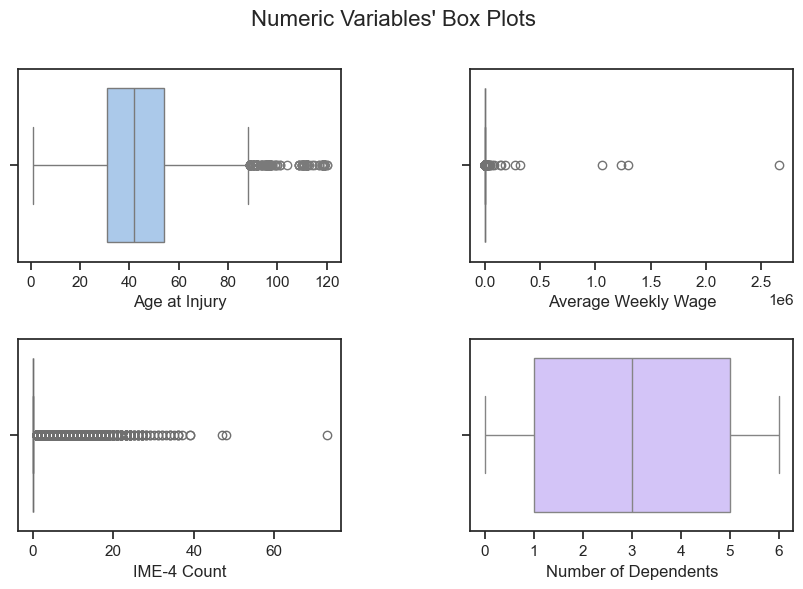

In [ ]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 90)
                &
                (X_train["Average Weekly Wage"] <= 0.2*1e6)
                &
                (X_train["IME-4 Count"] < 10)                            
                #&
                #(X_train["Number of Dependents"])                        #There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]
filtered_indices = X_train_out_man.index
y_train = y_train.loc[filtered_indices]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!
filtered_indices = X_train_out.index
y_train = y_train.loc[filtered_indices]

print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

---

Temporary dataset creation

In [ ]:
# train_preprocessed_df = pd.concat([X_train_out, y_train], axis=1)
# train_preprocessed_df.to_csv("train_preprocessed.csv")

In [ ]:
# validation_preprocessed_df = pd.concat([X_val, y_val], axis=1)
# validation_preprocessed_df.to_csv("validation_preprocessed.csv")

In [ ]:
# test_data.to_csv("test_preprocessed.csv")

In [ ]:
# train_data = pd.read_csv("train_preprocessed.csv", low_memory=False)
# validation_data = pd.read_csv("validation_preprocessed.csv", low_memory=False)
# test_data = pd.read_csv("test_preprocessed.csv")

In [ ]:
# train_data = train_data.set_index("Claim Identifier")
# validation_data = validation_data.set_index("Claim Identifier")
# test_data = test_data.set_index("Claim Identifier")

In [ ]:
# X_train_out = train_data.drop('Claim Injury Type', axis = 1)
# y_train = train_data['Claim Injury Type']

# X_val = validation_data.drop('Claim Injury Type', axis = 1)
# y_val = validation_data['Claim Injury Type']

<a class="anchor" id="feateng">

## 7. Feature Engineering
</a>

During our previous steps we have already created vairables such as:
- zip_code_cat 
- C-3 Date Bin
- C-2 Date Bin
- First Hearing Date

Another variables that have been created:

In [ ]:
X_train_out.columns

* Creating new feature Days Between Accident_Assembly

In [ ]:
X_train_out["Days Between Accident_Assembly"] = (X_train_out['Assembly Date'] - X_train_out['Accident Date']).dt.days
negative_count = (X_train_out["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)

In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)

In [ ]:
test_data["Days Between Accident_Assembly"] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_Assembly")
non_metric_features.remove("Assembly Date")
non_metric_features.remove("Accident Date")

* Creating new feature Days Between Accident_C2

In [ ]:
X_train_out["Days Between Accident_C2"] = (X_train_out['C-2 Date'] - X_train_out['Accident Date']).dt.days
negative_count = (X_train_out["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

In [ ]:
test_data["Days Between Accident_C2"] = (test_data['C-2 Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_C2")
non_metric_features.remove("C-2 Date")

- Creating feature Season_of_Accident

In [ ]:
# Create a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


X_train_out['Season_of_Accident'] = X_train_out['Accident Date'].dt.month.apply(get_season)
X_val['Season_of_Accident'] = X_val['Accident Date'].dt.month.apply(get_season)
test_data['Season_of_Accident'] = test_data['Accident Date'].dt.month.apply(get_season)

# Checking new feature 
print(X_train_out[['Accident Date', 'Season_of_Accident']].head())



In [ ]:
non_metric_features.append("Season_of_Accident")

Visualizing Season of Accident

In [ ]:
season_counts = X_train_out['Season_of_Accident'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title("Accident Frequency by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

* Creating feature Age_Group 

In [ ]:
bins = [0, 25, 35, 45, 55, 65, np.inf]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '65+']

X_train_out['Age_Group'] = pd.cut(X_train_out['Age at Injury'], bins=bins, labels=labels)
X_val['Age_Group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)
test_data['Age_Group'] = pd.cut(test_data['Age at Injury'], bins=bins, labels=labels)

print(X_train_out[['Age at Injury', 'Age_Group']].head())
non_metric_features.append("Age_Group")

Visualizing Age Group

In [ ]:
age_group_counts = X_train_out['Age_Group'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Frequency of Age Groups at Injury", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

Link to the website: https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf

* Creating feature WCIO Part of Body_cat

In [ ]:
def categorize_body_code(code):
    if 10 <= code <= 19:
        return 'Head'
    elif 20 <= code <= 29:
        return 'Neck'
    elif 30 <= code <= 39:
        return 'Upper Extremities'
    elif 40 <= code <= 49:
        return 'Trunk'
    elif 50 <= code <= 59:
        return 'Lower Extremities'
    elif code in [64, 65, 66, 90, 91, 99]:
        return 'Multiple Body Parts'
    else:
        return 'Unknown'


X_train_out['WCIO Part of Body_cat'] = X_train_out['WCIO Part Of Body Code'].apply(categorize_body_code) # Corrected the column name
X_val['WCIO Part of Body_cat'] = X_val['WCIO Part Of Body Code'].apply(categorize_body_code)
test_data['WCIO Part of Body_cat'] = test_data['WCIO Part Of Body Code'].apply(categorize_body_code)
non_metric_features.append("WCIO Part of Body_cat")

print(X_train_out[['WCIO Part of Body_cat', 'WCIO Part Of Body Code']].head())


Visualizing newly created variable

In [ ]:
body_category_counts = X_train_out['WCIO Part of Body_cat'].value_counts() # Corrected the column name


plt.figure(figsize=(10, 6))
sns.barplot(x=body_category_counts.index, y=body_category_counts.values, palette="viridis")
plt.title("Frequency of WCIO Part of Body Categories", fontsize=16)
plt.xlabel("Body Part Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Create feature WCIO Nature of Injury Code_cat

In [ ]:
def categorize_nature_of_injury(code):
    if  1<= code <= 59:
        return 'Specific Injury'
    elif 60 <= code <= 80:
        return 'Occupational Disease or Cumulative Injury'
    else:
        return 'Multiple Injuries'
  

X_train_out['WCIO Nature of Injury Code_cat'] = X_train_out['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
X_val['WCIO Nature of Injury Code_cat'] = X_val['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
test_data['WCIO Nature of Injury Code_cat'] = test_data['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
non_metric_features.append('WCIO Nature of Injury Code_cat')

print(X_train_out[['WCIO Nature of Injury Code_cat', 'WCIO Nature of Injury Code']].head())

Visualizing newly created variable

In [ ]:
nature_of_injury_category_counts = X_train_out['WCIO Nature of Injury Code_cat'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=nature_of_injury_category_counts.index, y=nature_of_injury_category_counts.values, palette="viridis")
plt.title("Frequency of WCIO Nature of Injury Categories", fontsize=16)
plt.xlabel("Nature of Injury Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Create feature WCIO Cause of Injury Code_cat

In [ ]:
def categorize_cause_of_injury(code):
    if  code in [1, 2, 3, 4, 5, 6,7,8,9,11,14,84]:
        return 'Burn or Scald'
    elif code in [10,12,13,20]:
        return 'Caught In, Under of Between'
    elif 15<= code <= 19:
        return 'Cut, Puncture, Scrape Injured By'
    elif 25<= code <= 33:
        return 'Fall, Slip or Trip Injury'
    elif code in [40,41,45,46,47,48,50]:
        return 'Motor Vehicle'
    elif code in [52,53,54,55,56,57,58,59,60,61,97]:
        return 'Strain or Injury By'
    elif 65 <= code <= 70:
        return 'Striking Against or Stepping On'
    elif code in [74,75,76,77,78,79,80,81,85,86]:
        return 'Struck or Injured By'
    elif code in [94,95]:
        return 'Rubbed or Abraded By'
    else: 
        return 'Miscellaneous Causes'

X_train_out['WCIO Cause of Injury_cat'] = X_train_out['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
X_val['WCIO Cause of Injury_cat'] = X_val['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
test_data['WCIO Cause of Injury_cat'] = test_data['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
non_metric_features.append('WCIO Cause of Injury_cat')

print(X_train_out[['WCIO Cause of Injury_cat', 'WCIO Cause of Injury Code']].head())

Visualizing newly created variable

In [ ]:
cause_of_injury_category_counts = X_train_out['WCIO Cause of Injury_cat'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=cause_of_injury_category_counts.index, y=cause_of_injury_category_counts.values, palette="viridis")
plt.title("Frequency of WCIO Cause of Injury  Categories", fontsize=16)
plt.xlabel("Cause of Injury Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Create feature Age at Assembly


In [ ]:
# # this variable has to be developed more
# X_train_out['Age_at_Assembly'] = pd.to_datetime(X_train_out['Assembly Date']).dt.year - X_train_out['Age at Injury']
# X_val['Age_at_Assembly'] = pd.to_datetime(X_val['Assembly Date']).dt.year - X_val['Age at Injury']
# train_data['Age_at_Assembly'] = pd.to_datetime(train_data['Assembly Date']).dt.year - train_data['Age at Injury']

# print(X_train[['Age at Injury', 'Age_at_Assembly']].head())

In [ ]:
# # Ensure the 'Accident Date' and 'Assembly Date' are in datetime format
# X_train_out['Accident Date'] = pd.to_datetime(X_train_out['Accident Date'])
# X_train_out['Assembly Date'] = pd.to_datetime(X_train_out['Assembly Date'])
# X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'])
# X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'])
# test_data['Accident Date'] = pd.to_datetime(test_data['Accident Date'])
# test_data['Assembly Date'] = pd.to_datetime(test_data['Assembly Date'])

# # Calculate Age at Assembly by subtracting the 'Accident Date' year from the 'Assembly Date' year
# X_train_out['Age_at_Assembly'] = (X_train_out['Assembly Date'].dt.year - X_train_out['Accident Date'].dt.year) + X_train_out['Age at Injury']
# X_val['Age_at_Assembly'] = (X_val['Assembly Date'].dt.year - X_val['Accident Date'].dt.year) + X_val['Age at Injury']
# test_data['Age_at_Assembly'] = (test_data['Assembly Date'].dt.year - test_data['Accident Date'].dt.year) + test_data['Age at Injury']

# # Print to verify
# print(X_train_out[['Age at Injury', 'Accident Date', 'Assembly Date', 'Age_at_Assembly']].head())

In [ ]:
# bins = [0, 25, 35, 45, 55, 65, np.inf]
# labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# X_train_out['Age_at_Assembly_bins'] = pd.cut(X_train_out['Age_at_Assembly'], bins=bins, labels=labels)
# X_val['Age_at_Assembly_bins'] = pd.cut(X_val['Age_at_Assembly'], bins=bins, labels=labels)
# test_data['Age_at_Assembly_bins'] = pd.cut(test_data['Age_at_Assembly'], bins=bins, labels=labels)

# print(X_train_out[['Age_at_Assembly_bins', 'Age_at_Assembly']].head())
# non_metric_features.append("Age_at_Assembly")

In [ ]:
# age_group_counts = X_train_out['Age_at_Assembly_bins'].value_counts()

# # Plotting
# plt.figure(figsize=(8, 6))
# sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
# plt.title("Frequency of Age Groups at Assembly", fontsize=16)
# plt.xlabel("Age Group", fontsize=14)
# plt.ylabel("Number of Accidents", fontsize=14)
# plt.show()

*  Average Weekly Wage by Industry

In [ ]:
X_train_out['Industry_Avg_Weekly_Wage'] = X_train_out.groupby('Industry Code')['Average Weekly Wage'].transform('mean')
X_val['Industry_Avg_Weekly_Wage'] = X_val.groupby('Industry Code')['Average Weekly Wage'].transform('mean')
test_data['Industry_Avg_Weekly_Wage'] = test_data.groupby('Industry Code')['Average Weekly Wage'].transform('mean')
metric_features.append('Industry_Avg_Weekly_Wage')

print(X_train_out[['Industry_Avg_Weekly_Wage', 'Industry Code']].head())


Plotting average weekly wage by industry 

In [ ]:
plt.figure(figsize=(12, 6))

industry_avg_wage = X_train_out.groupby('Industry Code')['Industry_Avg_Weekly_Wage'].mean()

sns.barplot(x=industry_avg_wage.index, y=industry_avg_wage.values, palette="viridis")


plt.title("Average Weekly Wage by Industry", fontsize=16)
plt.xlabel("Industry Code", fontsize=14)
plt.ylabel("Average Weekly Wage", fontsize=14)

plt.show()

In [ ]:
X_train_out.columns

In [ ]:
variables_to_drop = ['C-2 Date', 'Accident Date','Assembly Date']
X_train_out = X_train_out.drop(variables_to_drop, axis = 1)
X_val = X_val.drop(variables_to_drop, axis = 1)
test_data = test_data.drop(variables_to_drop, axis = 1)

In [ ]:
metric_features

In [ ]:
non_metric_features

In [ ]:
X_train_out.columns

##### Finding negative values in Metric columns and fixing them

In [ ]:
print("X_train with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_train_out[ X_train_out["Days Between Accident_Assembly"] < 0])) + ".")
print("X_val with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_val[ X_val["Days Between Accident_Assembly"] < 0])) + ".")

In [ ]:
print("X_train with values in [Days Between Accident_C2] that are negative: " + str(len(X_train_out[ X_train_out["Days Between Accident_C2"] < 0])) + ".")
print("X_val with values in [Days Between Accident_C2] that are negative: " + str(len(X_val[ X_val["Days Between Accident_C2"] < 0])) + ".")

In [ ]:
print("X_train with values in [Age at Injury] that are negative: " + str(len(X_train_out[ X_train_out["Age at Injury"] < 0])) + ".")
print("X_val with values in [Age at Injury] that are negative: " + str(len(X_val[ X_val["Age at Injury"] < 0])) + ".")

In [ ]:
# X_train[ X_train["Days Between Accident_Assembly"] < 0]["Days Between Accident_Assembly"] = 0
X_train_out["Days Between Accident_Assembly"] = X_train_out["Days Between Accident_Assembly"].clip(lower=0)
X_val["Days Between Accident_Assembly"] = X_val["Days Between Accident_Assembly"].clip(lower=0)
test_data["Days Between Accident_Assembly"] = test_data["Days Between Accident_Assembly"].clip(lower=0)

In [ ]:
X_train_out["Days Between Accident_C2"] = X_train_out["Days Between Accident_C2"].clip(lower=0)
X_val["Days Between Accident_C2"] = X_val["Days Between Accident_C2"].clip(lower=0)
test_data["Days Between Accident_C2"] = test_data["Days Between Accident_C2"].clip(lower=0)

<a class="anchor" id="transform">

## 8. Data Transformation - Encoding and Scaling 
</a>

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = X_train_out[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
non_metric_features

In [ ]:
X_val[non_metric_features].head()

In [ ]:
X_train_out[non_metric_features].head()
# 'WCIO Nature of Injury Code_cat'

In [ ]:
test_data[non_metric_features].head()
#'WCIO Cause of Injury_cat'

<a class="anchor" id="encode">

### 8.1 Feature Encoding
</a>

Label Encoder for target variable (training and validation):

In [ ]:
#Initiate Label encoder
label_encoder = LabelEncoder()

#Fit the encoder on the training target variable
Y_train_encoded = label_encoder.fit_transform(y_train)

#Transform the training and validation target variable
Y_val_encoded = label_encoder.transform(y_val)

#Convert the results back to DataFrames
Y_train_encoded_df = pd.DataFrame(Y_train_encoded, columns=['encoded_target'], index=pd.Series(y_train.index))
Y_val_encoded_df = pd.DataFrame(Y_val_encoded, columns=['encoded_target'], index=pd.Series(y_val.index))

In [ ]:
Y_train_encoded_df.head()

In [ ]:
Y_val_encoded_df.head()

One hot encoder for dependent variables (non-metric): (only for training and validation)

In [ ]:
X_train_copy = X_train_out.copy()
X_val_copy = X_val.copy()
test_data_copy = test_data.copy()

In [ ]:
print(X_val.columns)

#### Different encoding strategy - One hot encoder, label encoder, frequency encoder:

In [ ]:
oh_features_to_encode = ["Carrier Type", "County of Injury", "District Name", "Medical Fee Region", "zip_code_cat", "Season_of_Accident", "Age_Group", 'WCIO Part of Body_cat', 'WCIO Nature of Injury Code_cat', 'WCIO Cause of Injury_cat']
label_encoder_features = ["Alternative Dispute Resolution", "Attorney/Representative", "COVID-19 Indicator", "Gender"]
frequency_encoder_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]

1. ONE HOT ENCODER for low cardinality features:

In [ ]:
# # Initialize the encoder with the chosen settings
# ohc = OneHotEncoder(sparse_output=False, drop="first")

# # Fit the encoder on the training set only
# ohc.fit(X_train_copy[oh_features_to_encode])  

# # Transform the training set
# ohc_train_features = ohc.transform(X_train_copy[oh_features_to_encode])
# ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the training set
# X_train_encoded = pd.concat([X_train_copy.drop(columns=oh_features_to_encode), ohc_train_df], axis=1)

# # Transform the validation set using the same encoder (do not fit again)
# ohc_val_features = ohc.transform(X_val_copy[oh_features_to_encode])
# ohc_val_df = pd.DataFrame(ohc_val_features, index=X_val_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the validation set
# X_val_encoded = pd.concat([X_val_copy.drop(columns=oh_features_to_encode), ohc_val_df], axis=1)

# # Transform the test set using the same encoder (do not fit again)
# ohc_test_features = ohc.transform(test_data_copy[oh_features_to_encode])
# ohc_test_df = pd.DataFrame(ohc_test_features, index=test_data_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the test set
# test_data_encoded = pd.concat([test_data_copy.drop(columns=oh_features_to_encode), ohc_test_df], axis=1)

# # Final datasets : X_train_encoded, X_val_encoded, test_data_encoded

#### 2. Label encoder for binary features:

In [ ]:
# # Standardize the data to ensure consistent types and no unexpected whitespace
# X_train_copy[label_encoder_features] = X_train_copy[label_encoder_features].astype(str).apply(lambda x: x.str.strip())
# X_val_copy[label_encoder_features] = X_val_copy[label_encoder_features].astype(str).apply(lambda x: x.str.strip())
# test_data_copy[label_encoder_features] = test_data_copy[label_encoder_features].astype(str).apply(lambda x: x.str.strip())

# # Initialize a dictionary to store encoders for each feature
# label_encoders = {}

# # Encode the features
# for feature in label_encoder_features:
#     # Initialize a LabelEncoder for this feature
#     le = LabelEncoder()
    
#     # Fit the LabelEncoder on the training data for this feature
#     le.fit(X_train_copy[feature])
    
#     # Store the encoder for future use
#     label_encoders[feature] = le

#     # Transform the feature in all datasets (train, validation, test)
#     X_train_copy[feature] = le.transform(X_train_copy[feature])
#     X_val_copy[feature] = le.transform(X_val_copy[feature])
#     test_data_copy[feature] = le.transform(test_data_copy[feature])

# #Final datasets = X_train_copy, X_val_copy, test_data_copy

#### 3. Frequency encoder for codes:

In [ ]:
# # Create a dictionary to store frequency mappings for each feature
# frequency_encoders = {}

# # Apply Frequency Encoding
# for feature in frequency_encoder_features:
#     # Calculate frequency counts on the training data
#     freq_counts = X_train_copy[feature].value_counts(normalize=True)
    
#     # Store the frequency mapping for future reference
#     frequency_encoders[feature] = freq_counts

#     # Map the frequencies to the training set
#     X_train_copy[feature] = X_train_copy[feature].map(freq_counts)
    
#     # Map the frequencies to the validation set (using the training frequencies)
#     X_val_copy[feature] = X_val_copy[feature].map(freq_counts)
    
#     # Map the frequencies to the test set (using the training frequencies)
#     test_data_copy[feature] = test_data_copy[feature].map(freq_counts)

# # Final datasets:
# # - X_train_copy, X_val_copy, test_data_copy 

In [ ]:
# columns_to_add = label_encoder_features + frequency_encoder_features

# X_train_encoded = X_train_encoded.drop(columns=columns_to_add)
# X_train_encoded = pd.concat([X_train_encoded, X_train_copy[columns_to_add]], axis=1)

# X_val_encoded = X_val_encoded.drop(columns=columns_to_add)
# X_val_encoded = pd.concat([X_val_encoded, X_val_copy[columns_to_add]], axis=1)

# test_data_encoded = test_data_encoded.drop(columns=columns_to_add)
# test_data_encoded = pd.concat([test_data_encoded, test_data_copy[columns_to_add]], axis=1)


In [ ]:
X_train_encoded.shape

In [ ]:
X_val_encoded.shape

In [ ]:
test_data_encoded.shape

In [ ]:
X_train_encoded.describe(include="all").round(2).T

In [ ]:
X_val_encoded.describe(include="all").round(2).T

In [ ]:
test_data_encoded.describe(include="all").round(2).T

 - One hot encoder:

In [ ]:
# Initialize the encoder with the chosen settings
ohc = OneHotEncoder(sparse_output=False, drop="first")

# Fit the encoder on the training set only
ohc.fit(X_train_copy[non_metric_features])  

# Transform the training set
ohc_train_features = ohc.transform(X_train_copy[non_metric_features])
ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the training set
X_train_encoded = pd.concat([X_train_copy.drop(columns=non_metric_features), ohc_train_df], axis=1)

# Transform the validation set using the same encoder (do not fit again)
ohc_val_features = ohc.transform(X_val_copy[non_metric_features])
ohc_val_df = pd.DataFrame(ohc_val_features, index= X_val_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the validation set
X_val_encoded = pd.concat([X_val_copy.drop(columns=non_metric_features), ohc_val_df], axis=1)

# Transform the test set using the same encoder (do not fit again)
ohc_test_features = ohc.transform(test_data_copy[non_metric_features])
ohc_test_df = pd.DataFrame(ohc_test_features, index= test_data_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the test set
test_data_encoded = pd.concat([test_data_copy.drop(columns=non_metric_features), ohc_test_df], axis=1)

<a class="anchor" id="minmax">

### 8.2 Min-max Scaler
</a>

Min-max scaler for dependent variables (metric):

In [ ]:
X_train_out[metric_features].head(10)

In [ ]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training features
scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_train_min_max_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_train_min_max_scaled_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
scaled_feat = scaler.transform(X_val_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_val_min_max_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_val_min_max_scaled_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the test set using the same scaler (do not fit again)
scaled_feat = scaler.transform(test_data_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# Concatenate the scaled features back to the original DataFrames
test_min_max_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
test_min_max_scaled_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
X_train_min_max_scaled[metric_features].describe().round(2).T

In [ ]:
X_val_min_max_scaled[metric_features].describe().round(2).T
# Days between accident assembly & days between accident C2 have min values != from zero!! 

In [ ]:
test_min_max_scaled[metric_features].describe().round(2).T
# avg weekly wage max value very different from 1. 

<a class="anchor" id="std">

### 8.3 Standard Scaler
</a>

Standard scaler for dependent variables (metric):

In [ ]:
#Create a StandardScaler instance
standard_scaler = StandardScaler()

#Fit the scaler on the training set and transform the training features
standard_scaled_feat = standard_scaler.fit_transform(X_train_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_train_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_train_std_scaler = pd.concat([X_train_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_train_std_scaler_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(X_val_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_val_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_val_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_val_std_scaler_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(test_data_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=test_data_copy.index)

#Concatenate the scaled features back to the original DataFrames
test_std_scaler = pd.concat([test_data_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
# X_val_std_scaler = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_test_std_scaler_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

In [ ]:
X_train_std_scaler[metric_features].describe().round(2).T

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
X_train_std_scaler_encoded.shape

In [ ]:
X_val_std_scaler_encoded.shape

In [ ]:
X_test_std_scaler_encoded.shape

In [ ]:
X_train_std_scaler_encoded.describe(include="all").round(2).T

---

 - Comparing the macro F1 score for both scaling methods, we concluded that the Standard Scaler performed better, so we decided to use it.

---

<a class="anchor" id="featselect">

## 9. Feature Selection
</a>

<a class="anchor" id="filter">

### 9.1 Filter Methods
</a>

<a class="anchor" id="uni">

### 9.1.1 Univariate Variables
</a>

In [ ]:
metric_features_ = [col for col in metric_features if col in X_train.columns]

In [ ]:
X_train[metric_features_].var()

Since neither of the variables are univariate (variance=0), we will not dicard any of the variables based on this method.

<a class="anchor" id="chi">

### 9.1.2 Chi-Square
</a>

The Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables.

A high Chi-Square value and a low p-value indicate that the variables are likely dependent.

In [ ]:
cat_features=X_train_out[non_metric_features]

- Define a function that will test whether a categorical independent variable (var) is an important predictor for the target using the Chi-Square test of independence.

    It prints whether the variable is important or not for prediction based on the Chi-Square test.
 

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):
    #Create a contingency table to observe the relationship between the target variable y and the feature X 
    dfObserved = pd.crosstab(y,X) 
    #Perform the Chi-Square test of independence on the contingency table
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    #Create a DataFrame for the expected values from the Chi-Square test
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    #Check if the p-value is smaller than the alpha level
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result,f", p-value = {p}")

In [ ]:
#Run the function throughout the categorical variables
for var in cat_features:
    TestIndependence(cat_features[var],y_train, var)

With the Chi-Square test we conclude that all categorical features are important for prediction, and so, we will not dicard any of them

<a class="anchor" id="cramer">

### 9.1.3 Cramér's V
</a>

Cramér's V is a statistical measure used to assess the strength of association between two categorical variables. 

Provides a value between 0 and 1.

**Cramér's V values:**

- 0 to 0.1: Weak or insignificant association.
- 0.1 to 0.3: Moderate association.
- 0.3 to 0.5: Strong association.
- Above 0.5: Very strong association (potentially redundant).

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    
    contingency_table = pd.crosstab(x, y)

    chi2, _, _, _ = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()

    k = min(contingency_table.shape)

    v = np.sqrt(chi2 / (n * (k - 1)))
    
    return v

In [ ]:
non_metric_features

In [ ]:
X_train_encoded.columns.values

In [ ]:
#Drop columns of single codes, use the variables with categories
X_train_encoded=X_train_encoded.drop(columns=['WCIO Cause of Injury Code_7.035564779962712e-05',
       'WCIO Cause of Injury Code_7.538105121388619e-05',
       'WCIO Cause of Injury Code_8.79445597495339e-05',
       'WCIO Cause of Injury Code_9.296996316379297e-05',
       'WCIO Cause of Injury Code_0.00013819859389212468',
       'WCIO Cause of Injury Code_0.0002085542416917518',
       'WCIO Cause of Injury Code_0.00023619396047017675',
       'WCIO Cause of Injury Code_0.00026132097754147214',
       'WCIO Cause of Injury Code_0.0002638336792486017',
       'WCIO Cause of Injury Code_0.00036182904582665376',
       'WCIO Cause of Injury Code_0.00045731171069757627',
       'WCIO Cause of Injury Code_0.0004950022363045194',
       'WCIO Cause of Injury Code_0.000693505671167753',
       'WCIO Cause of Injury Code_0.0007563232138459915',
       'WCIO Cause of Injury Code_0.0007940137394529346',
       'WCIO Cause of Injury Code_0.0008241661599384891',
       'WCIO Cause of Injury Code_0.000917136123102282',
       'WCIO Cause of Injury Code_0.000944775841880707',
       'WCIO Cause of Injury Code_0.0010829744357728317',
       'WCIO Cause of Injury Code_0.0011935333108865315',
       'WCIO Cause of Injury Code_0.0012488127484433812',
       'WCIO Cause of Injury Code_0.0017061244591409575',
       'WCIO Cause of Injury Code_0.001987547050339466',
       'WCIO Cause of Injury Code_0.0022790204483664925',
       'WCIO Cause of Injury Code_0.00234686339445899',
       'WCIO Cause of Injury Code_0.0024498841644513014',
       'WCIO Cause of Injury Code_0.0025503922327364827',
       'WCIO Cause of Injury Code_0.0031710295543974794',
       'WCIO Cause of Injury Code_0.0032313343953685883',
       'WCIO Cause of Injury Code_0.0035027061797385786',
       'WCIO Cause of Injury Code_0.004213800762856238',
       'WCIO Cause of Injury Code_0.004457532828447804',
       'WCIO Cause of Injury Code_0.004786696752081774',
       'WCIO Cause of Injury Code_0.005073144746694541',
       'WCIO Cause of Injury Code_0.005171140113272593',
       'WCIO Cause of Injury Code_0.005646040735920076',
       'WCIO Cause of Injury Code_0.005653578841041465',
       'WCIO Cause of Injury Code_0.005706345576891185',
       'WCIO Cause of Injury Code_0.00578926473322646',
       'WCIO Cause of Injury Code_0.0064526179839086584',
       'WCIO Cause of Injury Code_0.006829523239978089',
       'WCIO Cause of Injury Code_0.006917467799727623',
       'WCIO Cause of Injury Code_0.007651176698209449',
       'WCIO Cause of Injury Code_0.007794400695515832',
       'WCIO Cause of Injury Code_0.008000442235500454',
       'WCIO Cause of Injury Code_0.00835222047449859',
       'WCIO Cause of Injury Code_0.008616054153747192',
       'WCIO Cause of Injury Code_0.008751740045932188',
       'WCIO Cause of Injury Code_0.010942815934549146',
       'WCIO Cause of Injury Code_0.01147048329304635',
       'WCIO Cause of Injury Code_0.01255848313223344',
       'WCIO Cause of Injury Code_0.013171582348773048',
       'WCIO Cause of Injury Code_0.013307268240958042',
       'WCIO Cause of Injury Code_0.013887702335304966',
       'WCIO Cause of Injury Code_0.017284875043344104',
       'WCIO Cause of Injury Code_0.017654242194292145',
       'WCIO Cause of Injury Code_0.017827618612084085',
       'WCIO Cause of Injury Code_0.018958334380292378',
       'WCIO Cause of Injury Code_0.019805114855595034',
       'WCIO Cause of Injury Code_0.020332782214092238',
       'WCIO Cause of Injury Code_0.02063179371724065',
       'WCIO Cause of Injury Code_0.020797632029911202',
       'WCIO Cause of Injury Code_0.021285096161094332',
       'WCIO Cause of Injury Code_0.021574056857414228',
       'WCIO Cause of Injury Code_0.025199885420802155',
       'WCIO Cause of Injury Code_0.026026564282447772',
       'WCIO Cause of Injury Code_0.02911467468050998',
       'WCIO Cause of Injury Code_0.03150927940740443',
       'WCIO Cause of Injury Code_0.03918558312268517',
       'WCIO Cause of Injury Code_0.04355265868967632',
       'WCIO Cause of Injury Code_0.046271401936790475',
       'WCIO Cause of Injury Code_0.05060832508329606',
       'WCIO Cause of Injury Code_0.05538999643196357',
       'WCIO Cause of Injury Code_0.05777706305373664',
       'WCIO Cause of Injury Code_0.06496338993612712',
       'WCIO Cause of Injury Code_0.10859142967701732',
       'WCIO Nature of Injury Code_7.53810512138862e-06',
       'WCIO Nature of Injury Code_2.261431536416586e-05',
       'WCIO Nature of Injury Code_5.5279437556849874e-05',
       'WCIO Nature of Injury Code_5.7792139263979416e-05',
       'WCIO Nature of Injury Code_0.00010553347169944068',
       'WCIO Nature of Injury Code_0.00014071129559925424',
       'WCIO Nature of Injury Code_0.00014573669901351332',
       'WCIO Nature of Injury Code_0.00017840182120619732',
       'WCIO Nature of Injury Code_0.0002789098894913789',
       'WCIO Nature of Injury Code_0.00030654960826980386',
       'WCIO Nature of Injury Code_0.00031660041509832203',
       'WCIO Nature of Injury Code_0.000344240133876747',
       'WCIO Nature of Injury Code_0.0004723879209403535',
       'WCIO Nature of Injury Code_0.0005000276397187784',
       'WCIO Nature of Injury Code_0.0006080738131253486',
       'WCIO Nature of Injury Code_0.0006130992165396077',
       'WCIO Nature of Injury Code_0.0006960183728748825',
       'WCIO Nature of Injury Code_0.0007437597053103437',
       'WCIO Nature of Injury Code_0.000753810512138862',
       'WCIO Nature of Injury Code_0.0008216534582313595',
       'WCIO Nature of Injury Code_0.001075436330651443',
       'WCIO Nature of Injury Code_0.0012010714160079201',
       'WCIO Nature of Injury Code_0.001289015975757454',
       'WCIO Nature of Injury Code_0.0015503369532989262',
       'WCIO Nature of Injury Code_0.0015980782857343873',
       'WCIO Nature of Injury Code_0.001861911964982989',
       'WCIO Nature of Injury Code_0.002085542416917518',
       'WCIO Nature of Injury Code_0.0022237410108096427',
       'WCIO Nature of Injury Code_0.002583057354929167',
       'WCIO Nature of Injury Code_0.0027715099829638823',
       'WCIO Nature of Injury Code_0.003336867867068029',
       'WCIO Nature of Injury Code_0.003374558392674972',
       'WCIO Nature of Injury Code_0.004688701385503721',
       'WCIO Nature of Injury Code_0.0048671032067099185',
       'WCIO Nature of Injury Code_0.004904793732316862',
       'WCIO Nature of Injury Code_0.00907085316273764',
       'WCIO Nature of Injury Code_0.00950555055807105',
       'WCIO Nature of Injury Code_0.009910095532918906',
       'WCIO Nature of Injury Code_0.010498067732387217',
       'WCIO Nature of Injury Code_0.012960515405374167',
       'WCIO Nature of Injury Code_0.013086150490730643',
       'WCIO Nature of Injury Code_0.021719793556427742',
       'WCIO Nature of Injury Code_0.021978601832262086',
       'WCIO Nature of Injury Code_0.030775570508922604',
       'WCIO Nature of Injury Code_0.03970319967435386',
       'WCIO Nature of Injury Code_0.04484670006884803',
       'WCIO Nature of Injury Code_0.06264919166386082',
       'WCIO Nature of Injury Code_0.08253220027237687',
       'WCIO Nature of Injury Code_0.09660081713059517',
       'WCIO Nature of Injury Code_0.19327952801411133',
       'WCIO Nature of Injury Code_0.294254958816819',
       'WCIO Part Of Body Code_0.00014573669901351332',
       'WCIO Part Of Body Code_0.0002537828724200835',
       'WCIO Part Of Body Code_0.0006658659523893281',
       'WCIO Part Of Body Code_0.000693505671167753',
       'WCIO Part Of Body Code_0.0008141153531099709',
       'WCIO Part Of Body Code_0.0010879998391870908',
       'WCIO Part Of Body Code_0.0012789651689289357',
       'WCIO Part Of Body Code_0.0013945494474568946',
       'WCIO Part Of Body Code_0.0017890436154762324',
       'WCIO Part Of Body Code_0.0020051359622893727',
       'WCIO Part Of Body Code_0.0021483599595957564',
       'WCIO Part Of Body Code_0.002326761780801954',
       'WCIO Part Of Body Code_0.0028041751051565665',
       'WCIO Part Of Body Code_0.0030328309605053548',
       'WCIO Part Of Body Code_0.003193643869761645',
       'WCIO Part Of Body Code_0.0032690249209755312',
       'WCIO Part Of Body Code_0.0034147616199890446',
       'WCIO Part Of Body Code_0.0034851172677886717',
       'WCIO Part Of Body Code_0.003517782389981356',
       'WCIO Part Of Body Code_0.0036057269497308895',
       'WCIO Part Of Body Code_0.004495223354054747',
       'WCIO Part Of Body Code_0.00453291387966169',
       'WCIO Part Of Body Code_0.004633421947946872',
       'WCIO Part Of Body Code_0.004952535064752323',
       'WCIO Part Of Body Code_0.006615943594872079',
       'WCIO Part Of Body Code_0.006734040575107167',
       'WCIO Part Of Body Code_0.006779269205835498',
       'WCIO Part Of Body Code_0.007364728703596681',
       'WCIO Part Of Body Code_0.009181412037851338',
       'WCIO Part Of Body Code_0.010236746754845745',
       'WCIO Part Of Body Code_0.010714160079200358',
       'WCIO Part Of Body Code_0.011302132278668671',
       'WCIO Part Of Body Code_0.011782058304730413',
       'WCIO Part Of Body Code_0.013196709365844344',
       'WCIO Part Of Body Code_0.013638944866299142',
       'WCIO Part Of Body Code_0.014028413630904221',
       'WCIO Part Of Body Code_0.014443009412580594',
       'WCIO Part Of Body Code_0.01735774339285086',
       'WCIO Part Of Body Code_0.018968385187120896',
       'WCIO Part Of Body Code_0.0196066114207318',
       'WCIO Part Of Body Code_0.020335294915799367',
       'WCIO Part Of Body Code_0.021976089130554956',
       'WCIO Part Of Body Code_0.02261682806587299',
       'WCIO Part Of Body Code_0.02413701259868636',
       'WCIO Part Of Body Code_0.024436024101834774',
       'WCIO Part Of Body Code_0.02686580665262904',
       'WCIO Part Of Body Code_0.03257215222952022',
       'WCIO Part Of Body Code_0.032612355456834295',
       'WCIO Part Of Body Code_0.043318977430913265',
       'WCIO Part Of Body Code_0.05513621355954349',
       'WCIO Part Of Body Code_0.06318690982918654',
       'WCIO Part Of Body Code_0.06550110810145285',
       'WCIO Part Of Body Code_0.08356994607742137',
       'WCIO Part Of Body Code_0.0895526888420968',
       'WCIO Part Of Body Code_0.14260335998472276'])

In [ ]:
for var in X_train_encoded:
    v = cramers_v(X_train_encoded[var], Y_train_encoded)
    print(f"{var}: Cramér's V = {v:.4f}")

Sorted Results to understand what features have a greater Cramér's V

In [ ]:
results = []

for var in X_train_encoded:
    v = cramers_v(X_train_encoded[var], Y_train_encoded)
    results.append((var, v))

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

for var, v in results_sorted:
    print(f"{var}: Cramér's V = {v:.4f}")


Features to Discard based on Cramér's V (<0.1):

- County of Injury
- District Name
- Medical Fee Region
- zip_code_cat
- Season_of_Accident
- Age_Group
- Alternative Dispute Resolution
- COVID-19 Indicator (Cramér's V = 0.0996)
- Gender (Cramér's V = 0.0908)
- **WCIO Nature of Injury** (cat)

Best Features based on Cramér's V (>0.3):
- Attorney/Representative: Cramér's V = 0.6078
- First Hearing Date Binary: Cramér's V = 0.5337
- C-2 Date Bin: Cramér's V = 0.4916
- C-3 Date Bin: Cramér's V = 0.4689

<a class="anchor" id="mi">

### 9.1.4 Mutual Information
</a>

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information
mi = mutual_info_classif(X_train_encoded, Y_train_encoded)

for var, score in zip(X_train_encoded.columns, mi):
    print(f"{var}: MI = {score:.4f}")

In [ ]:
# results_mi = []

# for var in X_train_encoded:
#     mi = mutual_info_classif(X_train_encoded, Y_train_encoded)
#     results_mi.append((var, v))

# results_sorted_mi = sorted(results_mi, key=lambda x: x[1], reverse=True)

# for var, v in results_sorted_mi:
#     print(f"{var}: MI = {v:.4f}")

Features to Discard based on Mutual Information (<0.01):
- County of Injury
- District Name (NY = 0.0228)
- Medical Fee Region (IV = 0.0242)
- zip_code_cat (1 = 0.0369)
- Season_of_Accident
- Age_Group
- Alternative Dispute Resolution
- COVID-19 Indicator
- WCIO Nature of Injury Code (cat)
   
    WCIO Nature of Injury Code_cat_Occupational Disease or Cumulative Injury: MI = 0.0000

    WCIO Nature of Injury Code_cat_Specific Injury: MI = 0.0249

<a class="anchor" id="rf">

### 9.1.5 Random Forest
</a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_encoded, Y_train_encoded)

# Features importance
feature_importances = rf_model.feature_importances_

# DF to display the results
feature_importances_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display important features
print(feature_importances_df)

# Selecting features with importance above a threshold
#threshold = 0.01  
#selected_features = feature_importances_df[feature_importances_df['Importance'] > threshold]

#print("\nSelected Features:")
#print(selected_features)

Random Forest

Features to Discard based on Importance (<0.005):

- Alternative Dispute Resolution
- County of Injury
- COVID-19 Indicator
- zip_code_cat
- WCIO Nature of Injury Code_cat


<a class="anchor" id="dt">

### 9.1.6 Decision Tree
</a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, Y_train_encoded)

# Obter importância das features
feature_importances = model.feature_importances_

# Criar um DataFrame para visualizar os resultados
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Selecionar as features acima de um limiar de importância (exemplo: 0.1)
threshold = 0.1
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
print("\nSelected Features:")
print(selected_features.tolist())


Decision Trees

Features to Discard based on Importance (<0.005):

- Alternative Dispute Resolution
- County of Injury
- COVID-19 Indicator
- District Name
- Medical Fee Region
- zip_code_cat
- Age_Group
- WCIO Nature of Injury Code_cat
- WCIO Cause of Injury_cat


<a class="anchor" id="cb">

### 9.1.7 Catboost
</a>

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Train a CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_encoded, Y_train_encoded)

# Get feature importances
feature_importances = catboost_model.get_feature_importance()

# Create a DataFrame to view the results
feature_importances_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances_df)

CatBoost

Features to Discard based on Importance (<1.0):

- Alternative Dispute Resolution
- County of Injury
- Medical Fee Region
- zip_code_cat
- WCIO Nature of Injury Code_cat
  
  -------------------------------
- **WCIO Cause of Injury_cat**
- **Age_Group**
- **Season_of_Accident**
- **COVID-19 Indicator**

** - Consider if threshold = 0.5

**Some ideas:**

Keep (almost for sure):

-  Attorney/Representative_1
-  C-2 Date Bin_1
-  C-3 Date Bin_1
-  First Hearing Date Binary_1
  


Discard (almost sure):

- County of Injury
- zip_code_cat ('zip_code_cat_4', 'zip_code_cat_5', 'zip_code_cat_6','zip_code_cat_7', 'zip_code_cat_8', 'zip_code_cat_9')
- Medical Fee Region ('Medical Fee Region_II','Medical Fee Region_III')
- Carrier Type ('Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN',)


<a class="anchor" id="wrapper">

### 9.2 Wrapper Methods
</a>

<a class="anchor" id="rfe">

#### 9.2.1 RFE
</a>

In [ ]:
model1 = LogisticRegression()

In [ ]:
rfe = RFE(estimator=model1, n_features_to_select=3)     #Try another values and see their scores
rfe

In [ ]:
X_train_std_scaler_num = X_train_std_scaler[metric_features]
X_val_std_scaler_num = X_val_std_scaler[metric_features]

X_train_std_scaler_num.head()

In [ ]:
X_rfe = rfe.fit_transform(X_train_std_scaler_num, y_train)

In [ ]:
rfe.support_

In [ ]:
rfe.ranking_

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)         #If it says True we should keep that feature
selected_features

Now let's see the optimum value for the number of features selected, to get the higher score

In [ ]:
#Nº of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_std_scaler_num,y_train)
    X_val_rfe = rfe.transform(X_val_std_scaler_num)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
   
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

Let's try the Recursive feature elimination with cross-validation method:

In [ ]:
model = LogisticRegression()
rfe_cv = RFECV(estimator=model, step=2, cv=7, scoring='accuracy')
rfe_cv.fit(X_train_std_scaler_num, y_train)
print("Optimal number of features:", rfe_cv.n_features_)
print("Best cross-validated score:", rfe_cv.score(X_val_std_scaler_num, y_val))

In [ ]:
plt.plot(list(range(1,7)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,7)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Using another classifier, to analyse the score

In [ ]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []
for n in range(len(nof_list)):
    #call support vector machines classifier
    model = RandomForestClassifier(random_state=27)
  
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
   
    X_train_rfe = rfe.fit_transform(X_train_std_scaler_num,y_train)
    X_val_rfe = rfe.transform(X_val_std_scaler_num)
   
    model.fit(X_train_rfe,y_train)
  
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
  
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
   
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
      
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)
      
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
plt.plot(list(range(1,7)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,7)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

As we can maybe predict, by this chart, is an overfitting using this model!

<a class="anchor" id="embedded">

### 9.3 Embedded Methods
</a>

<a class="anchor" id="lasso">

#### 9.3.1 Lasso Regression
</a>

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,6))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV(eps=0.01)      #Depending of the strength of the eps, we can get rid of some variables, TRY 0.1

In [ ]:
reg.fit(X_train_std_scaler_num, Y_train_encoded)

In [ ]:
coef = pd.Series(reg.coef_, index=X_train_std_scaler_num.columns)
coef

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
coef.sort_values()

In [ ]:
plot_importance(coef.sort_values(),'Lasso')


<a class="anchor" id="select">

### 9.4 Select K Best Method
</a>

In [ ]:
# Initialize SelectKBest with f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=5)        #Adjust the value of k

In [ ]:
selector.fit(X_train_std_scaler_num, Y_train_encoded)

In [ ]:
scores = pd.Series(selector.scores_, index=X_train_std_scaler_num.columns)

In [ ]:
def plot_importance_kbest(scores, name):
    plt.figure(figsize=(8, 6))
    scores.plot(kind="barh")
    plt.title("Feature importance using " + name + " Method")
    plt.show()

In [ ]:
plot_importance_kbest(scores.sort_values(), 'SelectKBest')

| Predictor                      | Spearman        | RFE LR   | RFE RandForest | RFECV   | Lasso | SelectKBest | What to do? (One possible way to "solve")          |
|--------------------------------|-----------------|----------|----------------|---------|-------|-------------|-----------------------------------------------------|
| Age at Injury                  | Keep            | Discard  | Keep           | Keep    | Keep?  | Keep?        | Include in the model                                |
| Average Weekly Wage            | Keep            | Keep     | Keep           | Keep    | Keep  | Keep        | Include in the model                                |
| IME-4 Count                    | Keep            | Discard  | Keep           | Keep    | Keep  | Keep        | Include in the model                                |
| Number of Dependents           | Discard         | Discard  | Keep           | Keep    | Discard| Discard     | Discard in the model                                |
| Days Between Accident_Assembly | Either this or Accident_C2 | Keep | Keep | Keep | Discard | Discard | Include in the model??                              |
| Days Between Accident_C2       | Either this or Accident_Assembly | Keep | Keep | Keep | Discard | Discard | Discard in the model??                              |


<hr>

### Categorical Data

| Predictor                      | Chi-Square | Cramér's V | Mutual Information | Decision Tree | Random Forest | CatBoost |
|--------------------------------|------------|------------|--------------------|---------------|---------------|--------------|
| Industry Code                  | Keep       |            |                    |               |                   |          |   
| WCIO Cause of Injury Code      | Keep       |            |                    |               |               |          |
| WCIO Nature of Injury Code     | Keep       |            |                    |               |               |          |
| WCIO Part Of Body Code         | Keep       |            |                     |               |               |          |
| Alternative Dispute Resolution | Keep       | Discard    | Discard            | Discard             | Discard              |  Discard         |
| Attorney/Representative        | Keep       | Keep(+)    | Keep               |   Keep               | Keep               |  Keep         |
| Carrier Type                   | Keep       | Keep       | Keep               |  Keep                |  Keep              |  Keep         |
| County of Injury               | Keep       | Discard    | Discard            | Discard               | Discard              | Discard          |
| COVID-19 Indicator             | Keep       | Discard(?) | Discard            | Discard              | Discard              |          | 
| District Name                  | Keep       | Discard    | Discard(?)         | Discard              | Keep               | Keep          |  
| Gender                         | Keep       | Discard(?) | Keep               | Keep                 | Keep               | Keep          |
| Industry Code Description      | Keep       | Keep       | Keep               |  Keep                | Keep               | Keep          |   
| Medical Fee Region             | Keep       | Discard    | Discard(?)         | Discard               | Keep               | Discard          |
| zip_code_cat                   | Keep       | Discard    | Discard(?)         |Discard              |  Discard             |  Discard         |
| First Hearing Date Binary      | Keep       | Keep(+)    | Keep               |Keep                  | Keep               | Keep          |
| C-2 Date Bin                   | Keep       | Keep(+)    | Keep               |Keep                  | Keep               | Keep          | 
| C-3 Date Bin                   | Keep       | Keep(+)    | Keep               | Keep                 | Keep               |Keep           |
| Season_of_Accident             | Keep       | Discard    | Discard            | Keep                 | Keep               |          |
| Age_Group                      | Keep       | Discard    | Discard            |Discard               | Keep               |          |
| WCIO Part of Body_cat          | Keep       | Keep       | Keep               | Keep                 | Keep               | Keep          | 
| WCIO Nature of Injury Code_cat | Keep       | Keep       | Discard(?)         | Discard              | Keep               |   Discard        |
| WCIO Cause of Injury_cat       | Keep       | Keep       | Keep               |Discard               | Discard             |          |


----

<a class="anchor" id="dropfeat">

### 9.5 Drop Features according to Feature Selections
</a>

We have checked the performance of our models firsly by deleting Days Between Accident_assembly and later by deleting Days Betweem Accident_C2. Our model performed better without Days Between Accident_C2 so we decided to keep Days Between Accident_Assembly.

In [ ]:
X_train_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)
X_val_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)
X_test_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)

### 10. Save Proprocessed Data
Saving the target variable back into the preprocessed dataset

In [ ]:
# train_encoded_df = pd.concat([X_train_std_scaler_encoded, y_train], axis=1)
# train_encoded_df.to_csv("train_encoded.csv")

In [ ]:
# validation_encoded_df = pd.concat([X_val_std_scaler_encoded, y_val], axis=1)
# validation_encoded_df.to_csv("validation_encoded.csv")

In [ ]:
# X_test_std_scaler_encoded.to_csv("test_encoded.csv")

In [ ]:
X_train = X_train_std_scaler_encoded
y_train = y_train

X_val = X_val_std_scaler_encoded
y_val = y_val

MODELS:

In [ ]:
# Functions to help display metrics for all models

# helper method for score_model - not to be used seperately
def print_scores(per_class, y_actual):
    for x,y in zip(per_class, np.unique(y_actual)):
        print("["+str(y)+"]:     \t" + str(round(x,2)))

# displays the scores for Precision, Recall, and F1
def score_model(y_actual, y_predicted, score_train, score_test):
    print("--------- Accuracy ---------")
    acc_score = accuracy_score(y_actual, y_predicted)
    print("Accuracy Score: " + str(acc_score))

    print("--------- Precision ---------")
    precision_per_class = precision_score(y_actual, y_predicted, average=None)
    print_scores(precision_per_class, y_actual)
    precision_weighted = precision_score(y_actual, y_predicted, average='macro')
    print("\nMacro precision: " + str(round(precision_weighted, 3)) + "\n")

    print("---------- Recall ----------")
    recall_per_class = recall_score(y_actual, y_predicted, average=None)
    print_scores(recall_per_class, y_actual)
    recall_per_weighted = recall_score(y_actual, y_predicted, average='macro')
    print("\nMacro recall: " + str(round(recall_per_weighted, 3)) + "\n")

    print("------------ F1 ------------")
    f1_per_class = f1_score(y_actual, y_predicted, average=None)
    print_scores(f1_per_class, y_actual)
    f1_per_weighted = f1_score(y_actual, y_predicted, average='macro')
    print("\nMacro f1: " + str(round(f1_per_weighted, 3)) + "\n")

    print("------ Individual Score Comparisons ------ ")
    print("Train Score: " + str(score_train))
    print("Test Score: " + str(score_test))
    diff = np.abs(score_train - score_test)
    print("Difference: " + str(diff))

In [ ]:
# Create the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

# Fit the model to the training set
model.fit(X_train, y_train)

# Determine the scores for the model for both train and validation sets
score_train = model.score(X_train, y_train)
score_test = model.score(X_val, y_val)

# Use the model to predict on the validation set
y_pred = model.predict(X_val)

# Display the model metrics using the score_model function
score_model(y_val, y_pred, score_train, score_test)


DECISION TREE:

Gridsearch - decision tree:

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Create a DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['gini', 'entropy'],                          # Split criterion
#     'splitter': ['best', 'random'],                             # Splitting strategy
#     'max_depth': [None, 10, 20, 30],                            # Max depth of the tree
#     'min_samples_split': [2, 5, 10],                            # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 4],                              # Minimum samples at a leaf node
#     'max_features': [None, 'sqrt', 'log2'],                     # Max features to consider for splits
#     'max_leaf_nodes': [None, 10, 20, 30],                       # Max number of leaf nodes
#     'min_impurity_decrease': [0.0, 0.1, 0.2]                   # Minimum impurity decrease to split
# }

# # Set up GridSearchCV with 5-fold cross-validation and scoring based on accuracy
# grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # You can also access the best model found
# best_model = grid_search.best_estimator_

# #Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
# #Best Score: 0.7769977245887005


Model - Decision Tree:

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Initialize the Decision Tree Classifier
# decision_tree = DecisionTreeClassifier(
#     criterion='gini',  # 'gini' for Gini Impurity or 'entropy' for Information Gain
#     max_depth=10, 
#     max_features=None,
#     max_leaf_nodes=None, 
#     min_impurity_decrease= 0.0,
#     min_samples_leaf= 1,
#     min_samples_split=2,
#     splitter='best',  # Maximum depth of the tree (None means no limit)
#     random_state=42    # Random seed for reproducibility
# )

# # Train the model
# decision_tree.fit(X_train, y_train)

# # Determine the scores for the model for both train and validation sets
# score_train = model.score(X_train, y_train)
# score_test = model.score(X_val, y_val)

# # Make predictions
# y_pred = decision_tree.predict(X_val)

# # Display the model metrics using the score_model function
# score_model(y_val, y_pred, score_train, score_test)


Grid Search - KNN 

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # Define the parameter grid for KNN
# param_grid = {
#     'n_neighbors': [3, 5, 10, 15],                 
#     'algorithm': ['brute', 'kd_tree'],             
#     'metric': ['euclidean', 'manhattan', 'minkowski'], 
#     'weights': ['uniform', 'distance']             
# }

# # Set up the GridSearchCV with KNN classifier
# grid_search = GridSearchCV(
#     KNeighborsClassifier(),
#     param_grid,
#     cv=5,                                         
#     scoring='f1_macro'                                                      
# )

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


Model - KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# # Create the KNN model
# # n_neighbors specifies the number of neighbors to use for classification
# knn_model = KNeighborsClassifier(n_neighbors=5)  

# # Fit the model to the training set
# knn_model.fit(X_train, y_train)

# # Determine the scores for the model for both train and validation sets
# score_train = knn_model.score(X_train, y_train)
# score_test = knn_model.score(X_val, y_val)

# # Use the model to predict on the validation set
# y_pred = knn_model.predict(X_val)

# # Display the model metrics using the score_model function
# score_model(y_val, y_pred, score_train, score_test)

NEURAL NETWORK:

GridSearch:

MODEL:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],  # Different hidden layer architectures
    'activation': ['relu', 'tanh'],                     # Activation functions
    'solver': ['adam', 'sgd'],                          # Optimizers
    'alpha': [0.0001, 0.001, 0.01],                     # L2 regularization (alpha)
    'learning_rate_init': [0.001, 0.01, 0.1],           # Learning rates
}

# Create the MLPClassifier model
mlp = MLPClassifier(max_iter=200, random_state=42)  # Keeping max_iter constant at 200

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='f1_macro',  # Evaluation metric
                           verbose=2,           # Display progress logs
                           n_jobs=-1)           # Use all available processors

# Fit the grid search to the training data
grid_search.fit(X_train_std_scaler_encoded, Y_train_encoded_df)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Create the model
model = MLPClassifier(hidden_layer_sizes=(64, 32),  # Two hidden layers: 64 and 32 neurons
                      activation='relu',           # ReLU activation function
                      solver='adam',               # Adam optimizer
                      alpha=0.0001,                # Regularization term (L2 penalty)
                      learning_rate_init=0.001,    # Initial learning rate
                      max_iter=200,                # Maximum number of iterations
                      random_state=42)             # For reproducibility

# Fit the model to the training set
model.fit(X_train, y_train)

# Determine the scores for the model for both train and validation sets
score_train = model.score(X_train, y_train)  # Accuracy on training data
score_test = model.score(X_val, y_val)      # Accuracy on validation data

# Use the model to predict on the validation set
y_pred = model.predict(X_val)

# Display the model metrics using the score_model function
score_model(y_val, y_pred, score_train, score_test)
